In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# generate a data frame, either specify a dictionary or create an array then specify the columns as well
df = pd.DataFrame(
    {"a": [1,2,3],
     "b": [4,5,6],
     "c": [7,8,9]},
     index=[1,2,3]
)

df = pd.DataFrame(
    [[1,4,7],
     [2,5,8],
     [3,6,9]],
     index=[1,2,3],
     columns=['a','b','c']
)

# series just requires a list to create
ser = pd.Series([5,6,7,8])

# create a multi-indexed data frame

dfMultiIndex = pd.DataFrame({'a': [1,2,3],
                             'b': [4,5,6],
                             'c': [7,8,9]},
                             index = pd.MultiIndex.from_tuples([('d',1),('d',2),('e', 1)], names=['x1','x2']))
#print(dfMultiIndex)

# use loc to specify location based on index and columns, use iloc to specify location using indices
#print(df.loc[1,'c'])
#print(df.iloc[0,2])
#print(dfMultiIndex.loc[('d',1), :])
#print(dfMultiIndex.loc[:, 'a'])
#print(dfMultiIndex.loc[('d',2):('e',1), 'a'])
#print(dfMultiIndex.loc[('e',1), 'a':'b'])
#print(dfMultiIndex.iloc[0,2])

# concatenate dataframes using concat function
df2 = pd.concat([df,df])
df3 = pd.concat([df,df], axis=1)
#print(df2)
#print(df3)

# sort values function is used to sort either columns (axis = 0) or rows (axis = 1)
df.sort_values('a', ascending=False)
df.sort_values(1, axis=1, ascending=False)

# drop is used to delete rows or columns, drop duplicates removes duplicate rows
df.drop(columns='c')
df.drop([1,3])
df.drop_duplicates()

# reset index
df.reset_index(drop=True)

# chooses first or last x rows
x = 2
df.head(x)
df.tail(x)

# chooses random x rows
df.sample(x)

# choose x largest or smallest rows based on column 'a'
df.nlargest(x, 'a')
df.nsmallest(x, 'a')

# transpose data frame
df.T

df['a'].value_counts() # counts number of entries of each unique value in column 'a'
df['a'].nunique() # counts number of different entries in column 'a'
df.describe() # gives detailed staistics of every column in dataframe

,a,b,c
count,3.0,3.0,3.0
mean,2.0,5.0,8.0
std,1.0,1.0,1.0
min,1.0,4.0,7.0
25%,1.5,4.5,7.5
50%,2.0,5.0,8.0
75%,2.5,5.5,8.5
max,3.0,6.0,9.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


array([<Axes: title={'center': 'total_bill'}>], dtype=object)

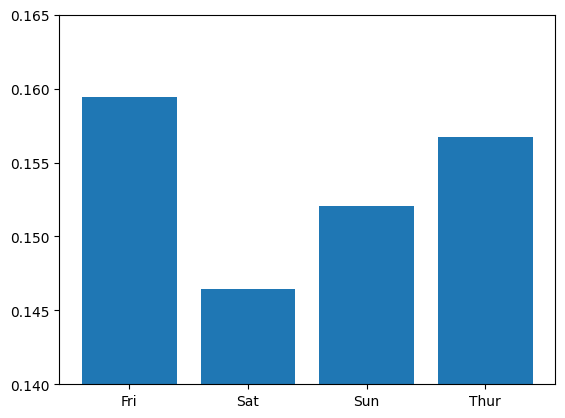

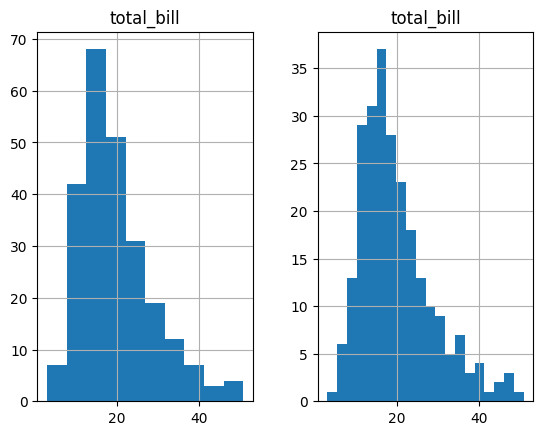

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

tipsdata = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
tipsdata.info()

# checking for missing values
tipsdata.isnull().sum()

# statistical analysis of data
tipsdata.describe()

# sort data by different columns
tipsdata.groupby(['day']).sum(numeric_only=True)
tipsdata.groupby(['day']).describe()
tipsdata.groupby(['sex']).describe()
tipsdata.groupby(['smoker']).describe()

# percentage of tip based on day
tips_day_percentage = tipsdata.groupby(['day']).sum(numeric_only=True)['tip']/tipsdata.groupby(['day']).sum(numeric_only=True)['total_bill']
tips_day_percentage = tips_day_percentage.to_frame('tip (%)').reset_index()
tips_day_percentage

fig, ax = plt.subplots()
#tips_day_percentage.plot(kind='bar', x='day', y='tip (%)', ax=ax)
ax.bar(tips_day_percentage['day'], tips_day_percentage['tip (%)'])
ax.set_ylim([0.14,0.165])

fig2, ax2 = plt.subplots(1,2)
tipsdata.hist(column='total_bill', ax=ax2[0])
tipsdata.hist(column='total_bill', bins=20, ax=ax2[1])

    day  count
0   Sat     87
1   Sun     76
2  Thur     62
3   Fri     19


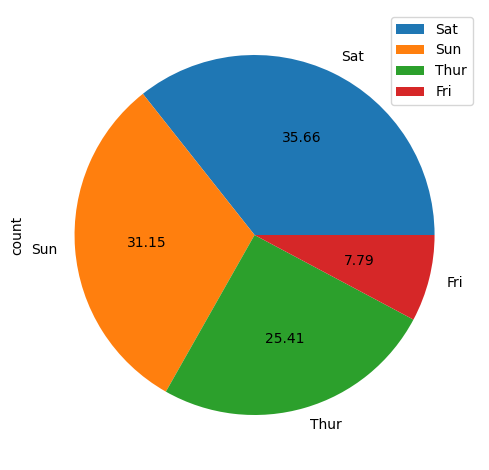

In [146]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

tipsdata = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

# pivot table that shows the sex in relation to whether they smoke and their total bill
piv_table = pd.pivot_table(tipsdata, values='total_bill', index=['sex', 'smoker'], aggfunc='sum')
piv_table

# pi chart that shows the owner the records of the waiter
tipsdata['day'] = tipsdata['day'].astype(str)

days = pd.DataFrame(tipsdata['day'].value_counts()).reset_index()
print(days)
fig, ax = plt.subplots()
#ax.pie(days['count'],labels=days['day'], autopct='%1.2f')
#ax.legend()
days.plot(kind='pie', y='count', labels=days['day'], autopct='%1.2f', ax=ax)
fig.tight_layout()